We're going to use the sequence generator by Geoffrey Aguirre's lab (https://cfn.upenn.edu/aguirre/wiki/public:web-based_sequence_evaluator) to generate the sequence of stimuli. The output should be identical to what one would get using their web interface, but allowing for a greater number of permutations.

In this example, we have 20 face stimuli (5 orientations, 4 identities) plus a blank trial, totaling 21 trials types.

In [1]:
# Import code to evaluate efficiency of the sequences
from evalseqshard import EvaluateSeqshard, vec2sim

# import other code
import numpy as np
from scipy.spatial.distance import squareform

In [2]:
# define parameters
par = {
    'N': 21,  # number of trial types
    'perms': 10000,  # how many permutations to compute
    'TrialDuration': 5,  # duration of the trials in seconds
    'BlankLength': 1,  # leave this as it is (or see evalseqshard.py)
    'doubleblanks': False,  # leave this as it is (or see evalseqshard.py)
    'target': 0,  # leave this as it is (or see evalseqshard.py)
    'numSeqs': 100  # number of sequences to output
}

Use three similarity matrices to compute the efficiency of the sequence. The three matrices will be 

1. Identity
2. Orientation
3. Mirror-symmetry

In [3]:
# similarity vectors
sim_vectors = np.array([
        [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
         0.0, 0.0, 0.0], 
        [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
         1.0, 1.0, 1.0], 
        [1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 
         1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 
         0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 
         1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 
         1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 
         0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 
         1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 
         1.0, 1.0, 1.0]
    ])

In [4]:
# place the similarity vectors into a matrix
nsim_vectors = len(sim_vectors)
sim_mat = np.zeros((20, 20, nsim_vectors))
for i, vec in enumerate(sim_vectors):
    sim_mat[:, :, i] = squareform(sim_vectors[i])

In [5]:
# let's visualize the similarity matrices
%matplotlib inline
from matplotlib import pyplot as plt

And these are the similarity matrices

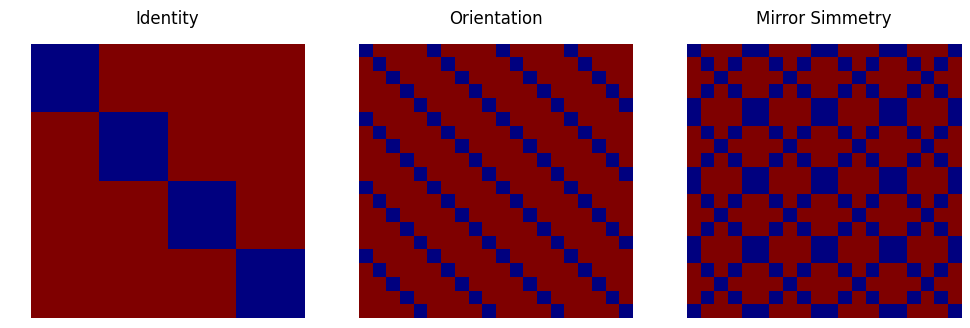

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
ax1.matshow(sim_mat[:, :, 0])
ax2.matshow(sim_mat[:, :, 1])
ax3.matshow(sim_mat[:, :, 2]);

for ax, title in zip((ax1, ax2, ax3), ('Identity', 'Orientation', 'Mirror Simmetry')):
    ax.set_title(title)
    ax.set_axis_off()

In [7]:
# Now compute the sequences (it can take a while given the number of permutations)
# set seed to get same sequence across runs
np.random.seed(485)
result = EvaluateSeqshard(par, sim_mat)

Save the results in txt files

In [8]:
# sort according to the efficiency of the first similarity matrix
sort_idx = np.argsort(result['bestEs'][0, :])[::-1]

efficiency = result['bestEs'][0, sort_idx].T
sequences = result['BestSeqs'][:, sort_idx].T

In [9]:
np.savetxt('sequences.txt', sequences, fmt='%d', delimiter=',')

In [10]:
np.savetxt('efficiency.txt', efficiency)

Each sequence is $21^2 + 1 = 442$ trials long. If you need more trials, you can append two sequences that end and start with the same trial type.